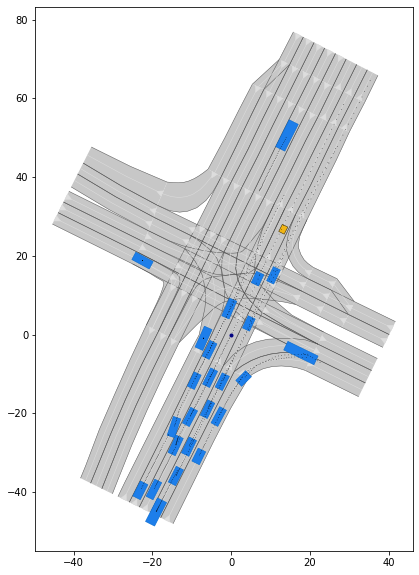

In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt

from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.draw_dispatch_cr import draw_object

file_path = 'USA_Lanker-1_1_T-1.xml'

scenario, planning_problem_set = CommonRoadFileReader(file_path).open()

plt.figure(figsize=(25, 10))
draw_object(scenario)
draw_object(planning_problem_set)
plt.gca().set_aspect('equal')
plt.show()


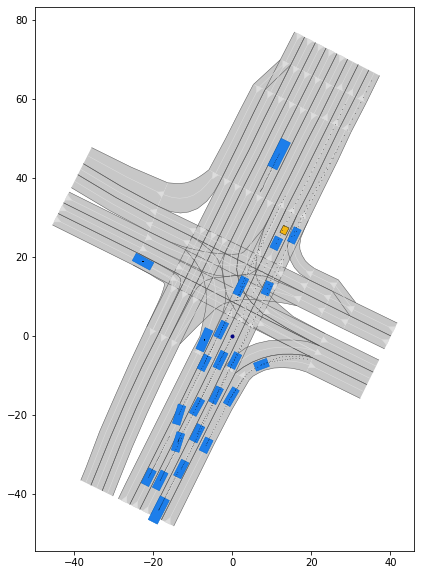

In [2]:
draw_parameters = {'time_begin': 10}

plt.figure(figsize=(25, 10))
draw_object(scenario, draw_params=draw_parameters)
draw_object(planning_problem_set)
plt.gca().set_aspect('equal')
plt.show()

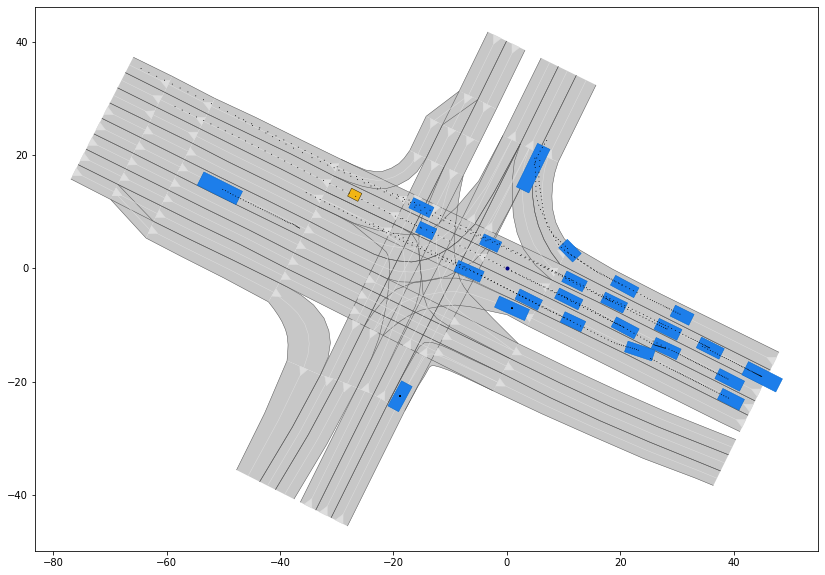

In [3]:
import numpy as np

translation = np.array([0.0, 0.0])
angle = np.pi/2

scenario.translate_rotate(translation, angle)
planning_problem_set.translate_rotate(translation, angle)

plt.figure(figsize=(25, 10))
draw_object(scenario)
draw_object(planning_problem_set)
plt.gca().set_aspect('equal')
plt.show()

In [4]:
from commonroad.planning.goal import GoalRegion
from commonroad.common.util import Interval, AngleInterval
from commonroad.scenario.trajectory import State

# define example goal region
goal_state_1 = State(time_step=Interval(3, 5), orientation=AngleInterval(0.1, 1), velocity=Interval(20, 30.5))
goal_state_2 = State(time_step=Interval(3, 6), orientation=AngleInterval(0.1, 1), velocity=Interval(15, 25.5))

goal_region = GoalRegion([goal_state_1, goal_state_2])

# state of the ego vehicle
state = State(time_step=3, orientation=0.5, velocity=25)

# check if the state is inside of the goal region
goal_region.is_reached(state)

True

In [6]:
from commonroad.common.file_writer import CommonRoadFileWriter
from commonroad.common.file_writer import OverwriteExistingFile

fw = CommonRoadFileWriter(scenario, planning_problem_set, "author", "affiliation", "source")

filename = "filename.xml"

fw.write_to_file(filename, OverwriteExistingFile.ALWAYS)

Replace file filename.xml


/home/sebastian/anaconda3/envs/commonroad-py36/lib/python3.6/site-packages/commonroad_io-2020.2-py3.6.egg/commonroad/common/file_writer.py:564: UserWarning: <CommonRoadFileWriter/lanelet.lanelet_type> Lanelet 3419 has no lanelet type! Default lanelet type is used!
  'lanelet type! Default lanelet type is used!' % lanelet.lanelet_id)
/home/sebastian/anaconda3/envs/commonroad-py36/lib/python3.6/site-packages/commonroad_io-2020.2-py3.6.egg/commonroad/common/file_writer.py:564: UserWarning: <CommonRoadFileWriter/lanelet.lanelet_type> Lanelet 3432 has no lanelet type! Default lanelet type is used!
  'lanelet type! Default lanelet type is used!' % lanelet.lanelet_id)
/home/sebastian/anaconda3/envs/commonroad-py36/lib/python3.6/site-packages/commonroad_io-2020.2-py3.6.egg/commonroad/common/file_writer.py:564: UserWarning: <CommonRoadFileWriter/lanelet.lanelet_type> Lanelet 3440 has no lanelet type! Default lanelet type is used!
  'lanelet type! Default lanelet type is used!' % lanelet.lanelet

In [7]:
import os

from commonroad.common.solution_writer import CommonRoadSolutionWriter, VehicleModel, VehicleType, CostFunction
from commonroad.scenario.trajectory import Trajectory, State

# prepare trajectory
pm_state_list = list()
for i in range(10):
    pm_state_list.append(State(**{'position': np.array([i, -i]), 'velocity': i*.2, 'velocity_y': i*0.001, 'time_step': i}))
trajectory_pm = Trajectory(0, pm_state_list)

# prepare control input vector (list of [x_acceleration, y_acceleration, time])
pm_input_list = np.array([[1.0, 3.5, 0.0], [2.0, 2.5, 0.1], [3.0, 1.5, 0.2]])

# write solution to a xml file
csw = CommonRoadSolutionWriter(output_dir=os.getcwd(), scenario_id='test_scenario', step_size=0.1,
                               vehicle_type=VehicleType.BMW_320i, vehicle_model=VehicleModel.PM,
                               cost_function=CostFunction.SA1)
# add trajectory solution
csw.add_solution_trajectory(trajectory_pm, planning_problem_id=5)

# or add control vector solution
csw.add_solution_input_vector(pm_input_list, planning_problem_id=8)

csw.write_to_file()

AttributeError: 'numpy.ndarray' object has no attribute 'state_list'